In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import animation, rc
from IPython.display import HTML, Image
import random

pd.set_option('display.float_format', '{:.2g}'.format)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from matplotlib import cycler
colors = cycler('color', 'bgrcmyk')
plt.style.use('default')
plt.style.use('fivethirtyeight')
plt.rc('axes', facecolor='#FFFFFF', edgecolor='#CCCCCC',
       axisbelow=True, grid=False, labelcolor = 'k',prop_cycle=colors,
       linewidth=1.5)
plt.rc('grid', color='#CCCCCC', linestyle='solid')
plt.rc('xtick', direction='out', color='k')
plt.rc('ytick', direction='out', color='k')
plt.rc('lines', linewidth=2)
plt.rc('figure', facecolor='#FFFFFF')
plt.rc('text', color = 'k')
plt.rc('patch',force_edgecolor=True,edgecolor='w',linewidth=2)
plt.rc('legend', facecolor='#EEEEEE', frameon=True, edgecolor='0.8')

Let's create data that follows the following equation:

$y = \beta_1X_1 + \beta_2X_2 + \epsilon$

Here is a function that creates our data

In [3]:
def create_data(num_samples,min_x1, min_x2, max_x1,max_x2,beta1,beta2,noise_var):
    np.random.seed(77)
    x1 = np.random.uniform(min_x1,max_x1,num_samples)
    x2 = np.random.uniform(min_x2,max_x2,num_samples)
    noise = np.random.normal(0,noise_var,num_samples)

    y = beta1*x1 + beta2*x2 + noise

    X = np.array([x1,x2]).T
    
    return X, y, x1, x2

Here is the Gradient Descent function

In [4]:
def grad_desc(learn_rate, num_iter, beta_init, X, low_thres = 0):

    ## Initialization steps
    beta = beta_init
    beta_path = np.zeros((num_iter+1,2))
    beta_path[0,:]= beta_init

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(beta.T,X.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(X)/num_samples  #sum up the gradients across all observations and divide by num_samples
        beta = beta + learn_rate*grad_vec
        beta_path[i+1, :]=beta
        
        # quick check to stop early if the loss is below a threshold
        if loss_vec[i]<=low_thres:
            return beta_path[:i+1], loss_vec[:i+1]
            
        
    return beta_path, loss_vec

### Initialize the data

In [5]:
beta1 = 10
beta2 = 0.1
min_x1 = -0.1
max_x1 = 0.1
min_x2 = -10
max_x2 = 10
num_samples = 1000
noise_var = .5
true_coef = [beta1, beta2]
X, y, x1, x2 = create_data(num_samples,min_x1, min_x2, max_x1,max_x2,beta1,beta2,noise_var)

### Normalize the data

In [6]:
scaler = StandardScaler()
x1_norm = scaler.fit_transform(x1.reshape(1, -1).T)
x1_norm = x1_norm[:,0]
true_coef_norm = np.copy(true_coef)
true_coef_norm[0] = true_coef[0]*scaler.scale_

x2_norm = scaler.fit_transform(x2.reshape(1, -1).T)
x2_norm = x2_norm[:,0]
true_coef_norm[1] = true_coef[1]*scaler.scale_

print(true_coef,true_coef_norm)

X_norm = np.array([x1_norm,x2_norm]).T

[10, 0.1] [0.56119741 0.58092269]


### Plot the original data in a 3D animation

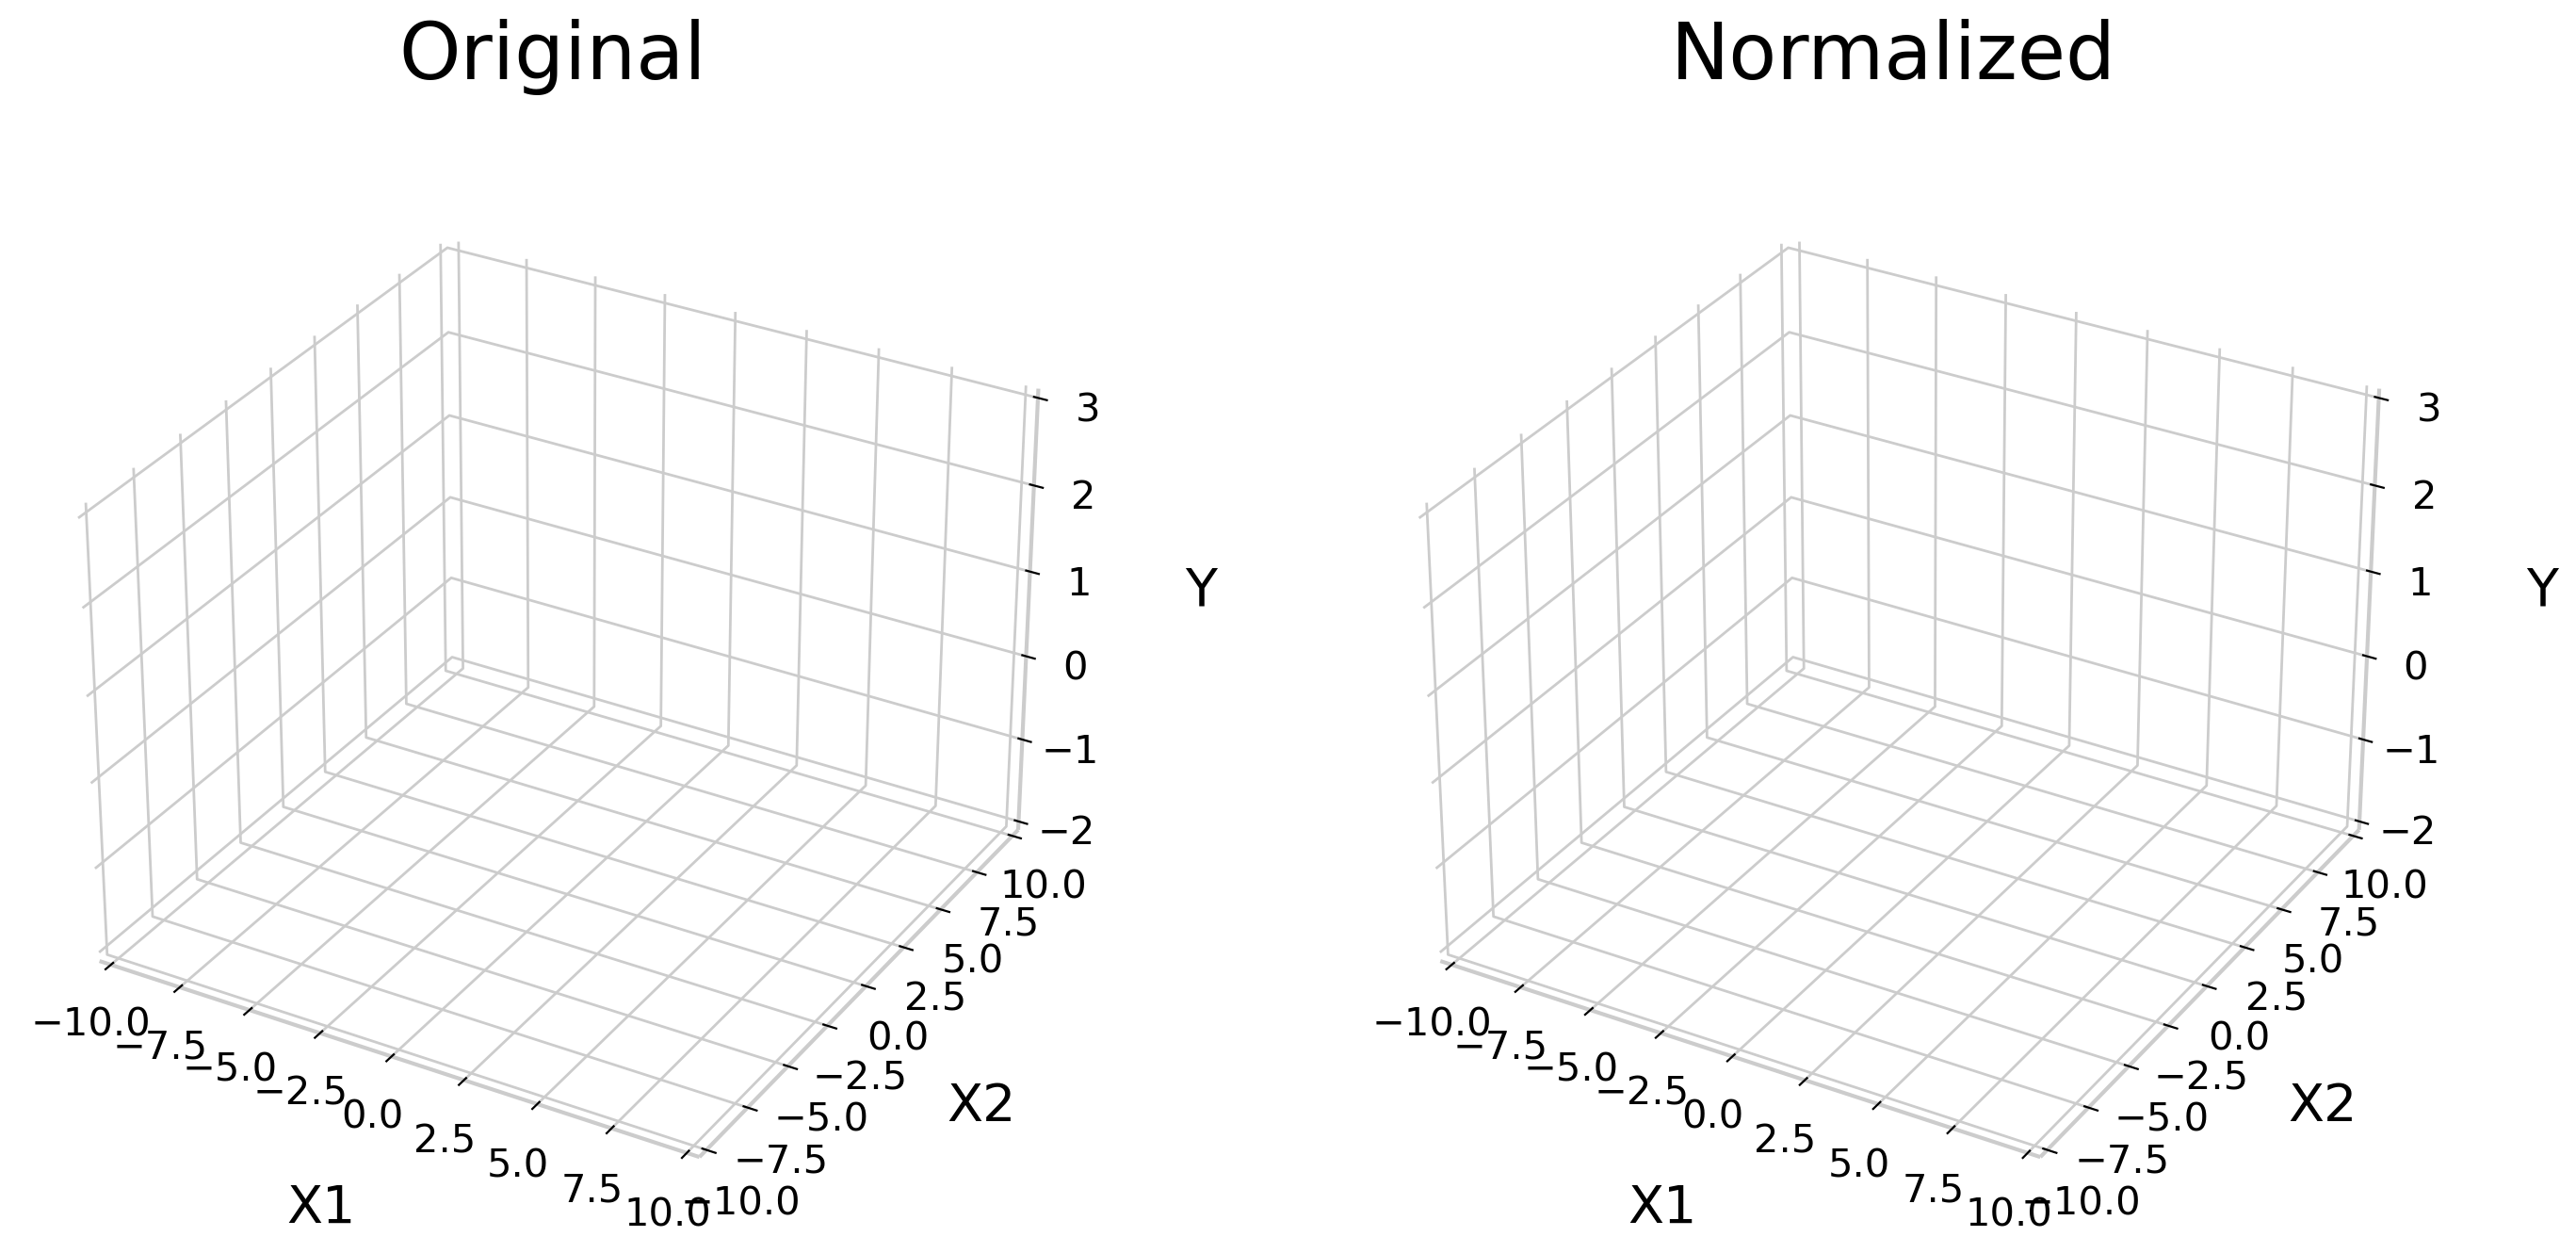

In [7]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

rc('animation', html='html5') 

fig = plt.figure(figsize=[15,7])
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


ax1.set_xlim((np.round(min(x2)), np.round(max(x2))))
ax1.set_ylim((np.round(min(x2)), np.round(max(x2))))
ax1.set_zlim(np.round(min(y)), np.round(max(y)+.1))
ax1.set_title('Original', y=1.15,fontsize=30)
ax1.set_xlabel('X1',labelpad=20,fontsize=20)
ax1.set_ylabel('X2',labelpad=20,fontsize=20)
ax1.set_zlabel('Y',labelpad=20,fontsize=20)
ax1.w_xaxis.set_pane_color((1,1,1,1))
ax1.w_yaxis.set_pane_color((1,1,1,1))
ax1.w_zaxis.set_pane_color((1,1,1,1))

ax2.set_xlim((np.round(min(x2)),np.round(max(x2))))
ax2.set_ylim((np.round(min(x2)),np.round(max(x2))))
ax2.set_zlim((np.round(min(y)),np.round(max(y))))
ax2.set_title('Normalized', y=1.15,fontsize=30)
ax2.set_xlabel('X1',labelpad=20,fontsize=20)
ax2.set_ylabel('X2',labelpad=20,fontsize=20)
ax2.set_zlabel('Y',labelpad=20,fontsize=20)
ax2.w_xaxis.set_pane_color((1,1,1,1))
ax2.w_yaxis.set_pane_color((1,1,1,1))
ax2.w_zaxis.set_pane_color((1,1,1,1))

line1, = ax1.plot([], [], [],'.' ,lw=2)
line2, = ax2.plot([], [], [],'.' ,lw=2)


In [8]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1,line2,)

In [9]:
# animation function. This is called sequentially
def animate(i):
    line1.set_data(X[:,0], X[:,1])
    line1.set_3d_properties(y)
    line1.set_color('red')
    line1.set_alpha(0.25)

    line1.axes.view_init((i)*4+45,25)
    line1.axes.xaxis.set_label_text('$X_1$',fontdict={'size':25,'weight':'bold'})
    line1.axes.yaxis.set_label_text('$X_2$',fontdict={'size':25,'weight':'bold'})
    line1.axes.zaxis.set_label_text('$Y$',fontdict={'size':35,'weight':'bold'})

    line2.set_data(X_norm[:,0], X_norm[:,1])
    line2.set_3d_properties(y)
    line2.set_color('blue')

    line2.axes.view_init((i)*4+45,25)
    line2.axes.xaxis.set_label_text('$Norm X_1$',fontdict={'size':25,'weight':'bold'})
    line2.axes.yaxis.set_label_text('$Norm X_2$',fontdict={'size':25,'weight':'bold'})
    line2.axes.zaxis.set_label_text('$Y$',fontdict={'size':35,'weight':'bold'})
    line2.set_alpha(0.25)

    return (line1,line2,)

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=200, blit=True)

In [11]:
# starts the animation
anim

RuntimeError: Requested MovieWriter (ffmpeg) not available

May require:

brew install yasm

brew install ffmpeg

brew install imagemagick

In [ ]:
# saves the animation as an mp4
anim.save('Origin_data.mp4')

In [ ]:
# saves the animation as a gif
from moviepy.editor import *
clip = VideoFileClip('Origin_data.mp4')
clip.write_gif('Origin_data.gif')

### Finding the optimal error

In [7]:
y_pred_opt = true_coef[0]*x1+true_coef[1]*x2
optimal_error = np.sum((y_pred_opt-y)**2)
print(optimal_error)

244.257494379


In [8]:
# we are going to determine the optimal error +0.1% as the stopping place
thres = 1.001
optimal_error_thres = optimal_error*thres
print(optimal_error_thres)

244.501751874


### Determining a good learning rate

For the original data (not normalized), we will determine a good learning rate that obtains the proper solution with the minimum number of steps.

In [9]:
learn_rate_vec = np.arange(2.5,7.5,0.2)*1e-2#[5, 5e-1, 5e-2, 5e-3, 5e-4]
num_iter = 100000

beta_init = np.array([-10,-10])

num_steps = []
num_steps2 = []
for iLearn in learn_rate_vec:
    beta_path1, loss_vec1 = grad_desc(iLearn, num_iter, beta_init, X,optimal_error_thres)
    num_steps.append(len(loss_vec1))
    beta_path2, loss_vec2 = grad_desc(iLearn, num_iter, beta_init, X_norm,optimal_error_thres)
    num_steps2.append(len(loss_vec2))

/Users/robertomac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in square
/Users/robertomac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in add


In [10]:
learn_rate = 0.059
num_iter = 20000
beta_init = np.array([-10,-10])
beta_path1, loss_vec1 = grad_desc(learn_rate, num_iter, beta_init, X, optimal_error_thres)
beta_path2, loss_vec2 = grad_desc(learn_rate, num_iter, beta_init, X_norm, optimal_error_thres)

We have determined that in the case of the "Original" data, the optimum learning rate is at 0.059.  This learning rate, obtains less than 1% of the optimal cost with the least amount of steps.  Higher learning rates lead to divergence.  In the case of the "Normalized" data, the number of steps required to reach less than 0.1% of the cost is about 2 orders of magnitude smaller than the "Original" data, regardless of the learning rate.  Also, the learning rate could still be increased for the "Normalized" data.

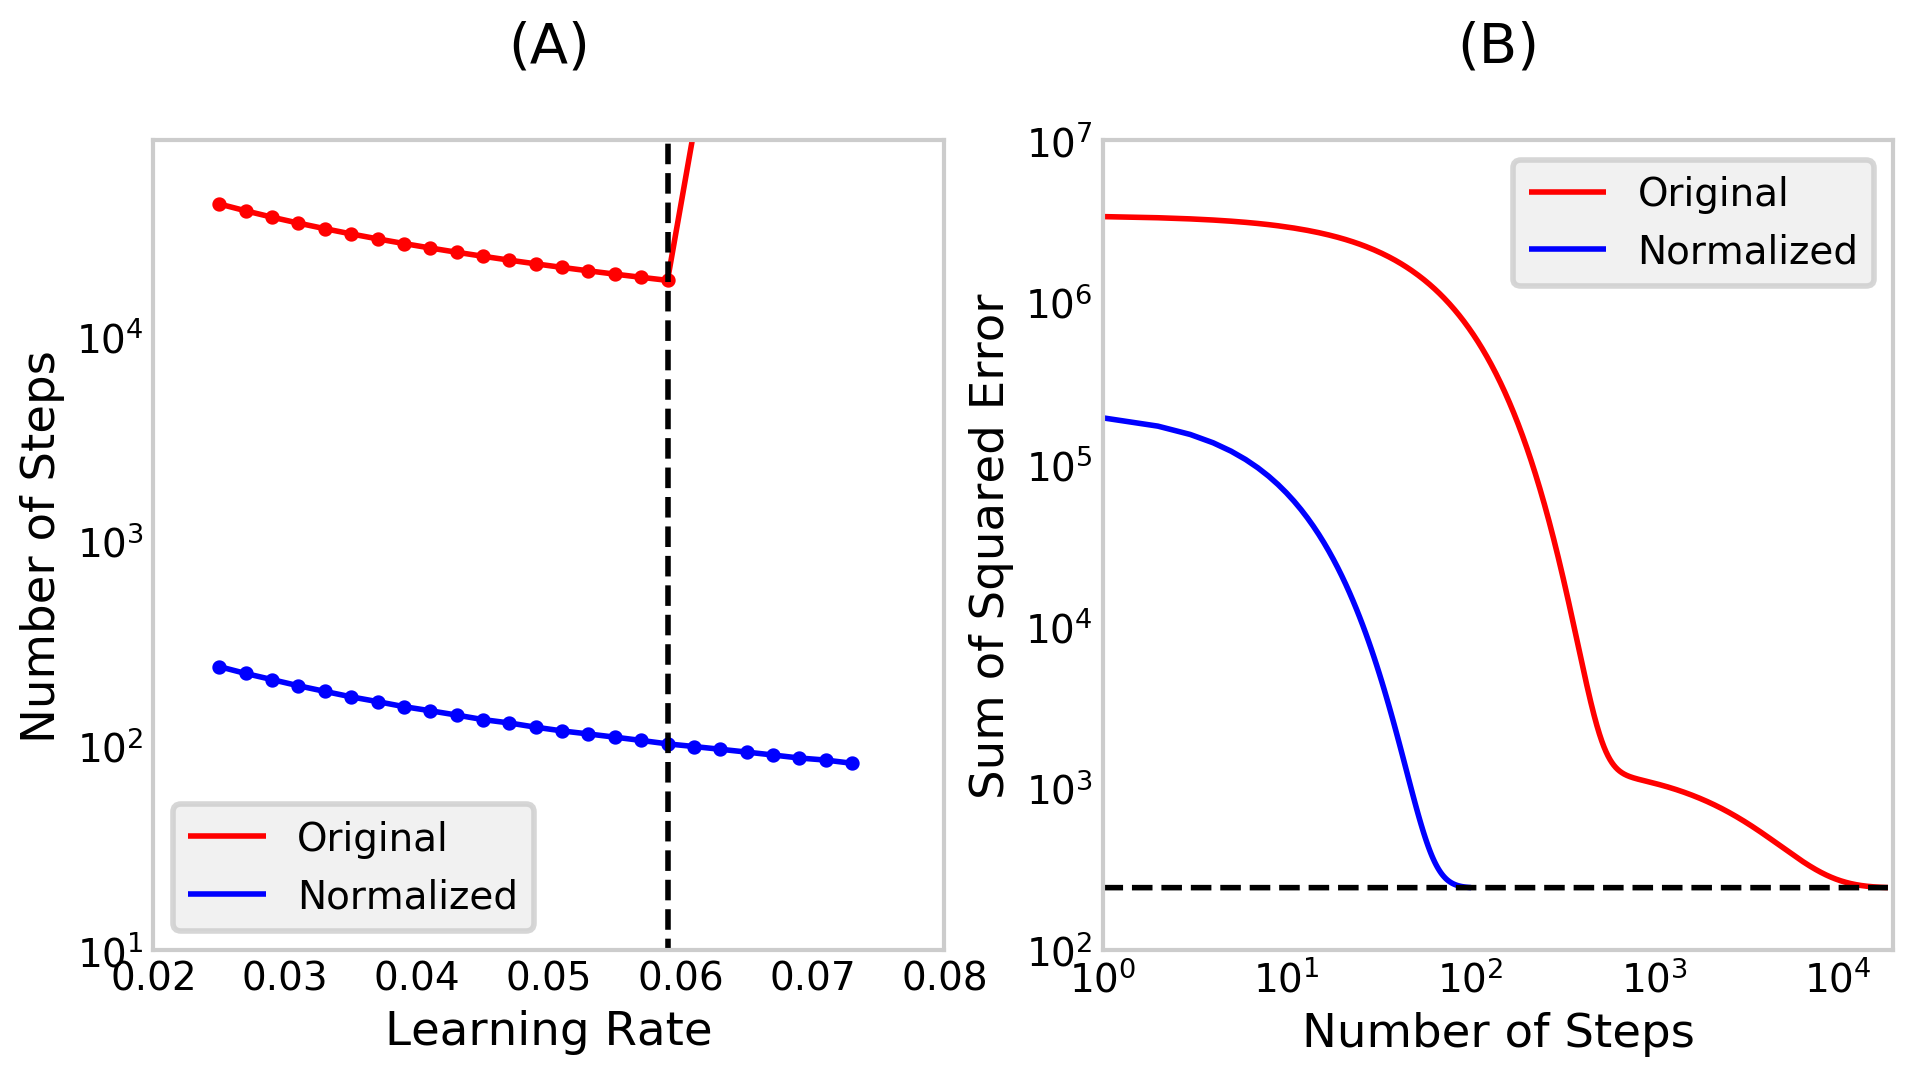

In [11]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.semilogy(learn_rate_vec,num_steps,color = 'red',linewidth=2)
plt.semilogy(learn_rate_vec,num_steps2,color='blue',linewidth=2)
plt.scatter(learn_rate_vec,num_steps,color='red',s=10)
plt.scatter(learn_rate_vec,num_steps2,color='blue',s=10)
plt.plot([0.059, 0.059],[1,1e5],'k--',linewidth=2)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Steps')
plt.axis([0.02,0.08,10,0.9e5])
plt.legend(['Original','Normalized'])
plt.title('(A)\n',loc='center')

plt.subplot(1,2,2)
plt.loglog(loss_vec1,'red',linewidth=2)
plt.loglog(loss_vec2,'blue',linewidth=2)
plt.loglog(range(len(loss_vec1)),np.ones(len(loss_vec1))*optimal_error,'k--',linewidth=2)
plt.xlabel('Number of Steps')
plt.ylabel('Sum of Squared Error')
plt.axis([1,2e4,100,1e7])
plt.legend(['Original','Normalized'])
plt.title('(B)\n',loc='center')

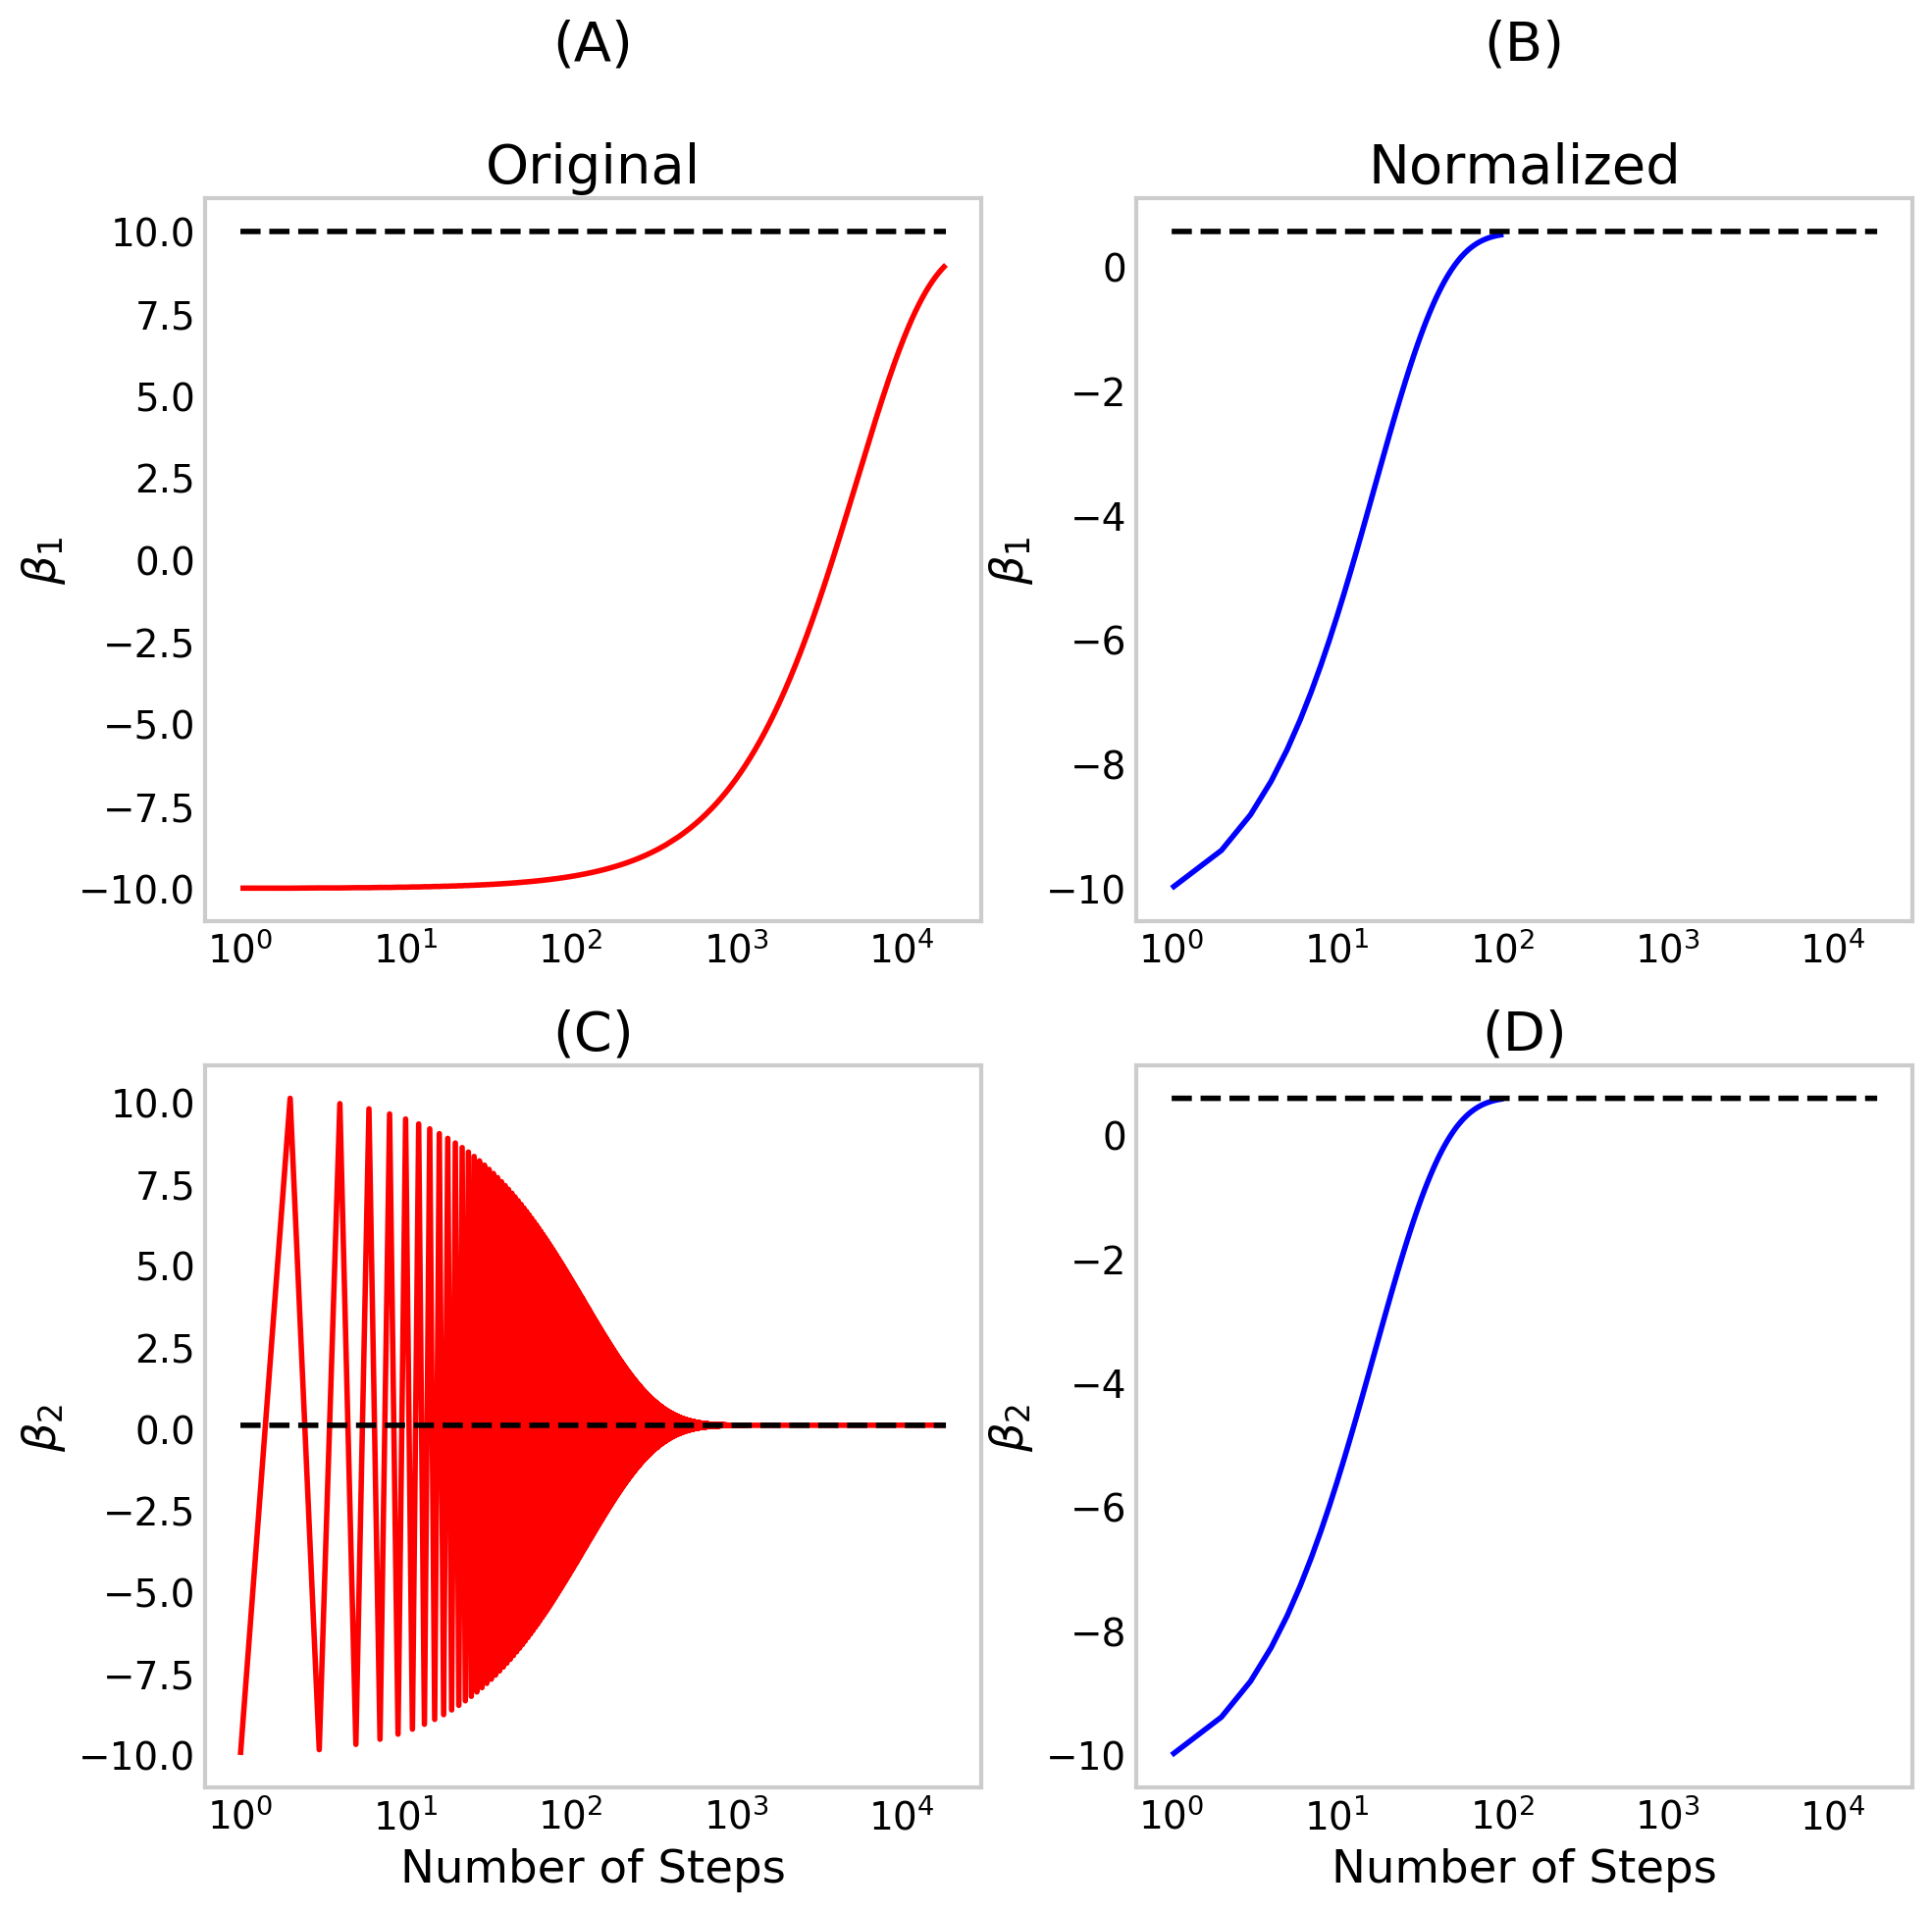

In [12]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.semilogx(range(1,len(beta_path1)+1),beta_path1[:,0],'r')
plt.plot(np.ones(len(beta_path1))*true_coef[0],'k--')
plt.ylabel(r'$\beta_1$')
plt.title('(A)\n\nOriginal')

plt.subplot(2,2,2)
plt.semilogx(range(1,len(beta_path2)+1),beta_path2[:,0],'b')
plt.plot(np.ones(len(beta_path1))*true_coef_norm[0],'k--')
plt.ylabel(r'$\beta_1$')
plt.title('(B)\n\nNormalized')

plt.subplot(2,2,3)
plt.semilogx(range(1,len(beta_path1)+1),beta_path1[:,1],'r')
plt.plot(np.ones(len(beta_path1))*true_coef[1],'k--')
plt.xlabel('Number of Steps')
plt.ylabel(r'$\beta_2$')
plt.title('(C)')

plt.subplot(2,2,4)
plt.semilogx(range(1,len(beta_path2)+1),beta_path2[:,1],'b')
plt.plot(np.ones(len(beta_path1))*true_coef_norm[1],'k--')
plt.xlabel('Number of Steps')
plt.ylabel(r'$\beta_2$')
plt.title('(D)')

In [13]:
from matplotlib import cm

def make_surf_plot(y, x1, x2, beta_path, coef,sub_pl):
    beta1 = coef[0]
    beta2 = coef[1]
    
    # Make data.
    res = 0.01
    X_mesh = np.arange(-1, 1+res, res)*20 ##
    Y_mesh = np.arange(-1, 1+res, res)*20 ##   
    X_mesh, Y_mesh = np.meshgrid(X_mesh, Y_mesh)

    Z = np.zeros(X_mesh.shape)
    for i in range(X_mesh.shape[0]):
        for j in range(X_mesh.shape[1]):
            Z[i,j] = np.sum(((X_mesh[i,j]*x1 + Y_mesh[i,j]*x2)-y)**2)
    
    plt.subplot(1,2,sub_pl)
    plt.imshow(Z,vmin=Z.min(), vmax=Z.max(),
              extent=[-20,20,-20,20],#[X_mesh.min(), X_mesh.max(), Y_mesh.min(), Y_mesh.max()],
              cmap='jet')
    plt.colorbar()
    
    plt.plot(beta_path[:,0],beta_path[:,1],c='orange',linewidth=.5)

    plt.scatter(beta_path[:,0],beta_path[:,1],c='orange',s=1)
    plt.plot(beta_path[0,0],beta_path[0,1],color='red',marker='o', markersize=15)
    plt.plot(beta1,beta2,color='red',marker='X', markersize=15)

    plt.xlabel(r'$\beta_1$',fontdict={'size':25,'weight':'bold'})
    plt.ylabel(r'$\beta_2$',fontdict={'size':25,'weight':'bold'})
    if sub_pl == 1:
        plt.title('(A)\n')
    else:
        plt.title('(B)\n')

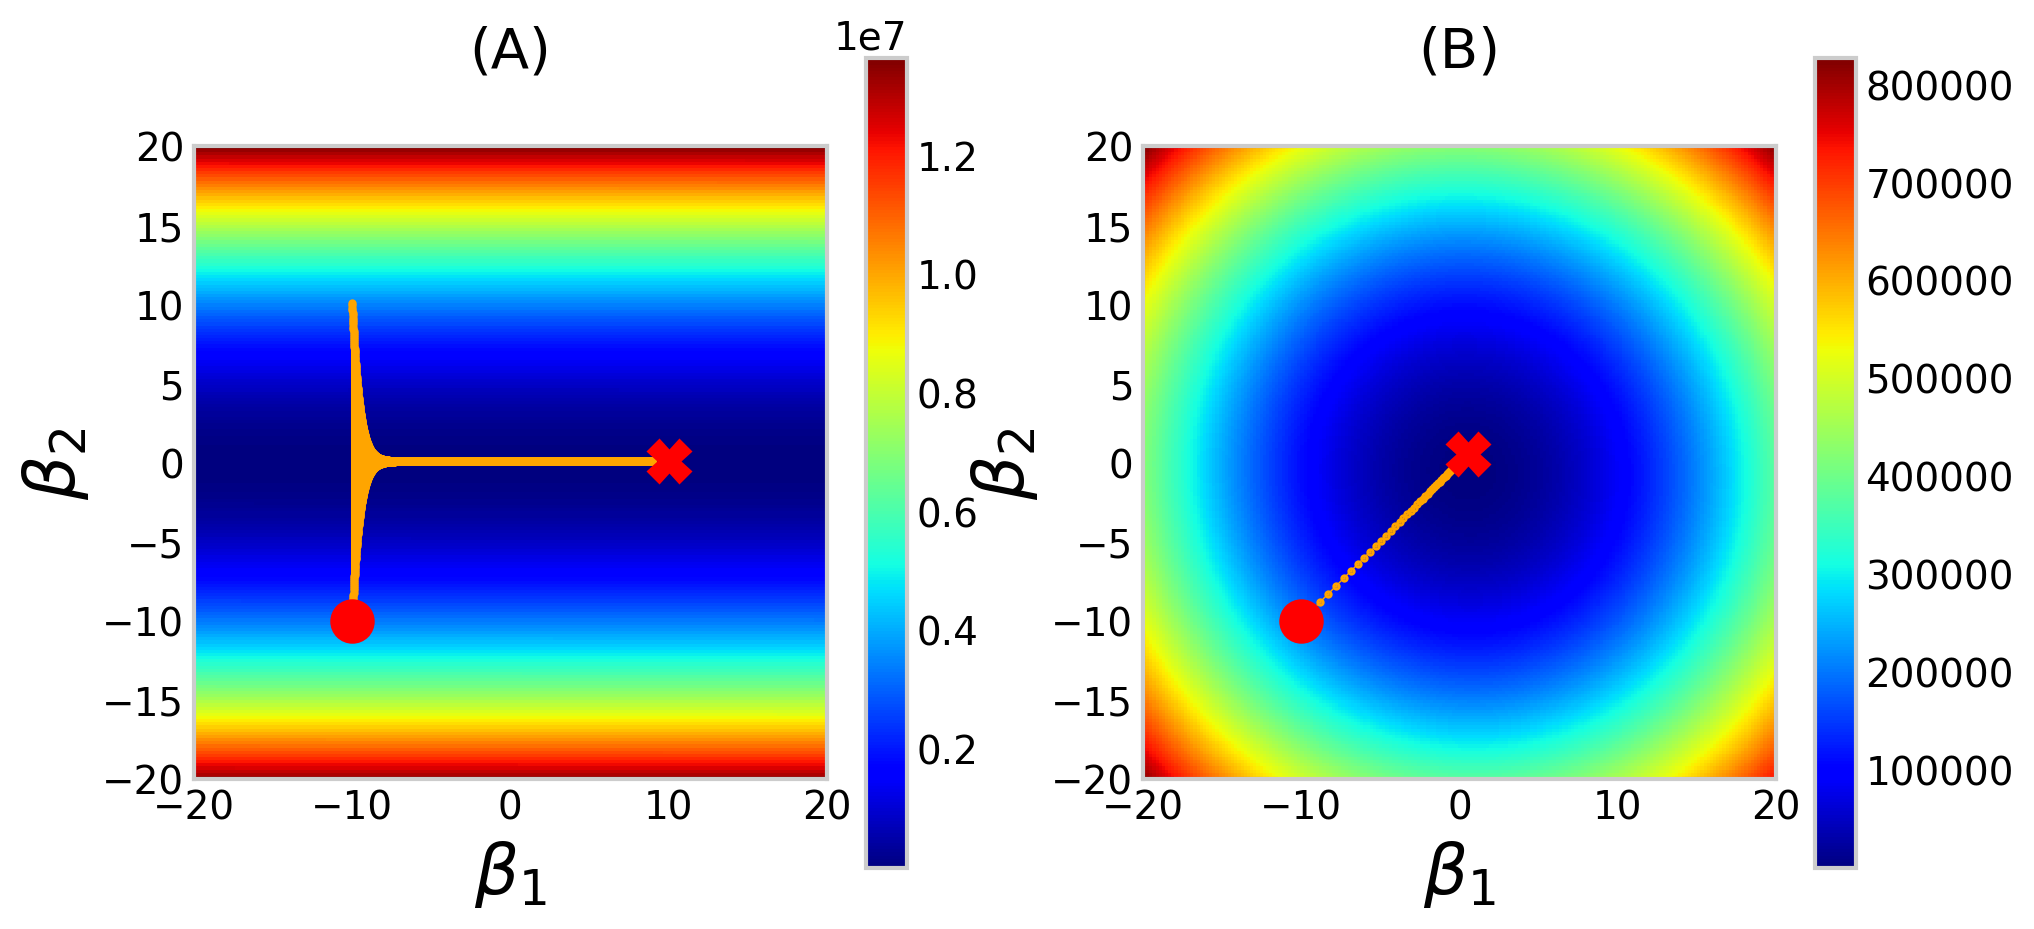

In [14]:
fig = plt.figure(figsize=[10,5])

make_surf_plot(y, x1, x2, beta_path1, true_coef,1)
make_surf_plot(y, x1_norm, x2_norm, beta_path2, true_coef_norm,2)

# Random Starting Points

In [15]:
num_steps = []
num_steps_norm = []
num_iter = 100000
for i in range(1000):
    if i%10==0:
        print(i)
    beta_init = np.array([random.uniform(-20,20),random.uniform(-20,20)])
    beta_path1, loss_vec1 = grad_desc(learn_rate, num_iter, beta_init, X, optimal_error_thres)
    beta_path2, loss_vec2 = grad_desc(learn_rate, num_iter, beta_init, X_norm, optimal_error_thres)
    
    num_steps.append(len(loss_vec1))
    num_steps_norm.append(len(loss_vec2))


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


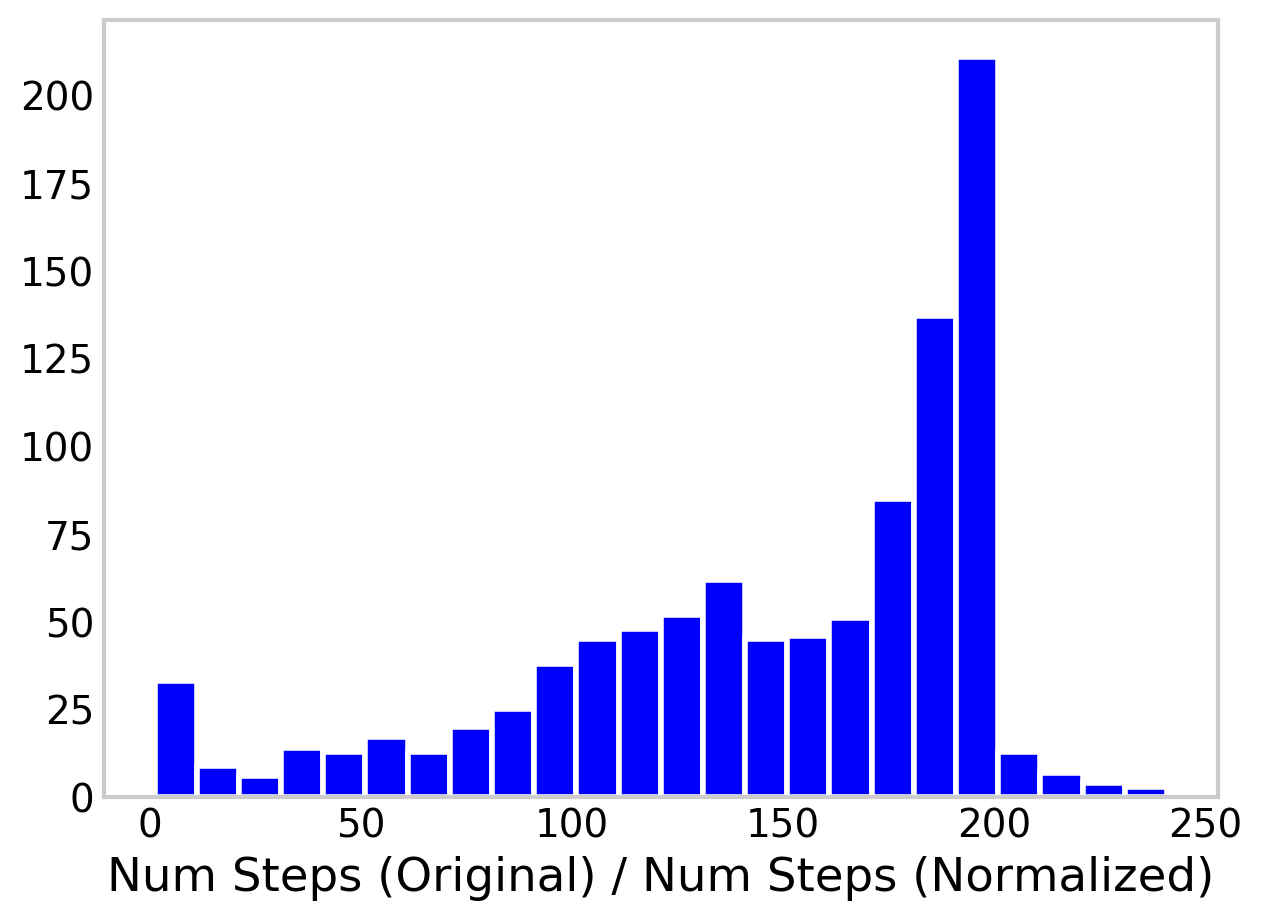

In [16]:
plt.hist(np.array(num_steps)/np.array(num_steps_norm),np.arange(1,250,10));
plt.xlabel('Num Steps (Original) / Num Steps (Normalized)')